In [1]:
from ROOT import TFile, TCanvas, TPad, TH1D, TH2D, TLegend, TLatex

Welcome to JupyROOT 6.24/00


In [9]:
f = TFile("../MetaInfo/2017/fakerate_electron.root")
#f = TFile("fakerate_electron_MeasElectron__TightWP80_LooseWPLoose__.root")
h = f.Get("fakerate2D")
h.GetXaxis().SetRangeUser(10., 70.)
h.SetDirectory(0)
f.Close()

In [10]:
# prepare canvas and legend and logo
cvs = TCanvas("cvs", "cvs", 720, 800)
pad_up = TPad("pad_up", "", 0, 0.25, 1, 1)
pad_up.SetBottomMargin(0.02)
pad_down = TPad("pad_down", "", 0, 0, 1, 0.25)
pad_down.SetTopMargin(0.08)
pad_down.SetBottomMargin(0.3)
pad_down.SetGrid()
legend = TLegend(0.65, 0.50, 0.9, 0.87)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

info = TLatex()
info.SetTextSize(0.035)
info.SetTextFont(42)
logo = TLatex()
logo.SetTextSize(0.04)
logo.SetTextFont(61)
extra_logo = TLatex()
extra_logo.SetTextSize(0.035)
extra_logo.SetTextFont(52)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


In [11]:
projections = dict()
projections["eta1"] = h.ProjectionX("eta0to0p9", 1, 1)
projections["eta1"].SetLineColor(2)
projections["eta2"] = h.ProjectionX("eta0p9to1p6", 2, 2)
projections["eta2"].SetLineColor(3)
projections["eta3"] = h.ProjectionX("eta1p6to2p4", 3, 3)
projections["eta3"].SetLineColor(4)

legend.AddEntry(projections["eta1"], "0 < |#eta| < 0.8", "lep")
legend.AddEntry(projections["eta2"], "0.8 < |#eta| < 1.479", "lep")
legend.AddEntry(projections["eta3"], "1.479 < |#eta| < 2.5", "lep")

ratios = dict()
ratios['eta1'] = projections['eta1'].Clone("ratio1")
ratios['eta2'] = projections['eta2'].Clone("ratio2")
ratios['eta3'] = projections['eta3'].Clone("ratio3")

for bin in range(1, ratios['eta1'].GetNbinsX()+1):
    content = ratios['eta1'].GetBinError(bin)/ratios['eta1'].GetBinContent(bin)
    ratios['eta1'].SetBinContent(bin, content)
    ratios['eta1'].SetBinError(bin, 0)
    ratios['eta1'].SetMarkerColor(2)
for bin in range(1, ratios['eta2'].GetNbinsX()+1):
    content = ratios['eta2'].GetBinError(bin)/ratios['eta2'].GetBinContent(bin)
    ratios['eta2'].SetBinContent(bin, content)
    ratios['eta2'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(3)
for bin in range(1, ratios['eta3'].GetNbinsX()+1):
    content = ratios['eta3'].GetBinError(bin)/ratios['eta3'].GetBinContent(bin)
    ratios['eta3'].SetBinContent(bin, content)
    ratios['eta3'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(4)

for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    hist.GetYaxis().SetRangeUser(0., 1.)
    hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetYaxis().SetTitle("fake rate (e)")

for hist in ratios.values():
    hist.SetStats(0)
    hist.SetTitle("")
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetTitleSize(0.1)
    hist.GetXaxis().SetTitleOffset(0.8)
    hist.GetXaxis().SetLabelSize(0.08)
    hist.GetYaxis().SetRangeUser(0., 0.5)
    hist.GetYaxis().SetTitle("#Delta fr/fr")
    hist.GetYaxis().CenterTitle()
    hist.GetYaxis().SetTitleSize(0.1)
    hist.GetYaxis().SetTitleOffset(0.4)
    hist.GetYaxis().SetLabelSize(0.08)
    hist.SetMarkerStyle(8)
    hist.SetMarkerSize(0.7)


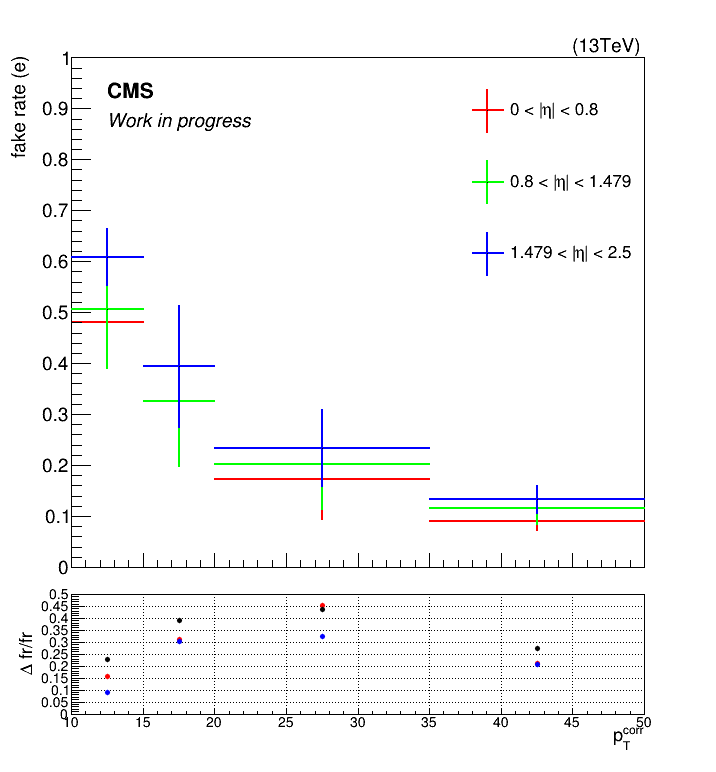

In [12]:
pad_up.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")
info.DrawLatexNDC(0.80, 0.91, "(13TeV)")
logo.DrawLatexNDC(0.15, 0.83, "CMS")
extra_logo.DrawLatexNDC(0.15, 0.78, "Work in progress")
pad_down.cd()
#ratios["eta1"].Draw("L")
ratios["eta1"].Draw("P")
ratios["eta2"].Draw("same&P")
ratios["eta3"].Draw("same&P")

cvs.cd()
pad_up.Draw()
pad_down.Draw()
cvs.Draw()
